# Know What They Know

# EDA on my What's App Data 

In [12]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

<IPython.core.display.Javascript object>

In [13]:
def pp_(*args, ndash=120):
    for arg in args:
        print(arg)
        print('-'*ndash)

## Data Preprocessing

* Regex cheatsheet
    * https://www.rexegg.com/regex-quickstart.html
* Datetime format
    * http://strftime.org/

In [20]:
# f = open('./data/WhatsApp Chat with Cse official.txt', 'r')

In [15]:
# f.read()

In [16]:
def rawToDf(file):
    with open(file, 'r', encoding = 'utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
   
    # converting date-time pattern which is of type String to type datetime, format is to be specified for the whole string where the placeholders are extracted by the method    
    try:
        df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%y, %I:%M %p - ') #10/20/19, 10:24 pm - 
    except:
        df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%y, %I:%M %p - ') #20/10/2019, 10:24 pm -
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [17]:
me = ">>shubhajit"

### Data

In [18]:
df = rawToDf('./data/WhatsApp Chat with Cse official.txt')

In [19]:
df.head(10)

,date_time,user,msg
0,2019-07-03 13:42:00,grp_notif,"Amitabh created group ""CSE OFFICIAL"""
1,2019-07-03 13:42:00,grp_notif,You were added
2,2019-07-03 11:33:00,Manish CS,All of you download there provisional and grad...
3,2019-07-03 11:33:00,Manish CS,From
4,2019-07-03 11:33:00,Manish CS,Login
5,2019-07-03 13:10:00,Dinesh CS,Waiting for this message
6,2019-07-03 15:07:00,grp_notif,Amitabh added Sushree CS
7,2019-07-03 17:06:00,Rakesh CS,Why?
8,2019-07-03 17:09:00,Debasish CS,Because BPUT website is running under RAM KE B...
9,2019-07-03 17:26:00,Rakesh CS,Okay bro


In [12]:
df.tail(10)

,date_time,user,msg
369,2019-08-10 19:29:00,+91 95564 89867,Congratulations both of you..# urbashi and tejas
370,2019-08-10 19:30:00,Urbashi CS,Thnk you lo Kete au wish karibu abe ba Gapile...
371,2019-08-10 19:30:00,+91 95564 89867,Tejas mu already achhi searching yard re
372,2019-08-10 19:30:00,+91 95564 89867,Chup
373,2019-08-10 19:30:00,Urbashi CS,☺
374,2019-08-10 19:30:00,+91 95564 89867,Grp re post karuchu
375,2019-08-10 19:31:00,Urbashi CS,😍
376,2019-08-10 19:31:00,+91 95564 89867,Eithi formalities maintain karuchi na
377,2019-08-10 19:31:00,+91 95564 89867,Nahele kharap bhabibuni ru
378,2019-08-10 19:32:00,+91 95564 89867,Tu


In [13]:
df.shape # no. of msgs

(379, 3)

### No. of Images, group notifications and dropping them

In [14]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(11, 3)

In [15]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(14, 3)

In [16]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [17]:
df.reset_index(inplace=True, drop=True)
df.shape

(354, 3)

## Q 1)
## Who is the most active member of the group. Who is the least active. Is it same on weekday weekend?

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

In [18]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Abinash CS Atul      32
Satyajit CS          21
Sujit CS             19
Manish CS            18
AniL CS              17
Subhashree CS        16
>>shubhajit          16
Amitabh              14
Dinesh CS            13
Rajib                12
Urbashi CS           12
+91 95564 89867      12
Debasish CS          12
Madhu CS             12
+91 70081 17186      11
Anu QnQn             10
Sanjukta CS          10
Rakesh CS             8
Heenu                 8
+91 93487 43366       8
Subham Sharma CS      8
Fahad CS              8
Arijit CS             7
Bikram CS             7
Himanshu CS           7
Jagat CS              7
Utkal CS              6
Swagat CS             4
Baburam CS            3
Ompriya CS            3
Priyanka CS Kanki     2
Smaranika CS          2
Smruti Keshari CS     2
Yashbant CS           2
Sibaprasad_Cs         1
Siso                  1
Sourav Sadhu CS       1
Pint OO CS            1
+91 85968 54944       1
Name: msg, dtype: int64

In [19]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [20]:
df.weekday.value_counts(sort=True)

Thursday     96
Monday       78
Saturday     57
Sunday       39
Friday       38
Tuesday      26
Wednesday    20
Name: weekday, dtype: int64

In [21]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [22]:
df[df["is_weekend"]].groupby("user")["msg"].count().sort_values(ascending=False)

user
+91 95564 89867      8
>>shubhajit          7
Himanshu CS          6
Urbashi CS           6
AniL CS              6
Subhashree CS        5
Amitabh              5
Satyajit CS          5
Rajib                5
Abinash CS Atul      4
Manish CS            4
Debasish CS          4
Jagat CS             3
Anu QnQn             3
+91 70081 17186      3
Madhu CS             3
Heenu                2
Fahad CS             2
Dinesh CS            2
Sujit CS             2
Swagat CS            2
+91 93487 43366      2
Utkal CS             1
Bikram CS            1
Rakesh CS            1
Siso                 1
Smaranika CS         1
Smruti Keshari CS    1
Yashbant CS          1
Name: msg, dtype: int64

## Q 2)
## Count of all the emoticons that i have used till date.

In [23]:
pp_(df["user"].unique(),df["user"].unique().shape)

['Manish CS' 'Dinesh CS' 'Rakesh CS' 'Debasish CS' 'Satyajit CS'
 'Subhashree CS' 'Swagat CS' 'Pint OO CS' '+91 70081 17186' 'Arijit CS'
 'Urbashi CS' 'AniL CS' 'Anu QnQn' 'Fahad CS' 'Amitabh' 'Abinash CS Atul'
 'Subham Sharma CS' 'Sujit CS' 'Rajib' '>>shubhajit' 'Madhu CS'
 '+91 95564 89867' '+91 93487 43366' 'Utkal CS' 'Ompriya CS' 'Himanshu CS'
 'Jagat CS' 'Bikram CS' 'Heenu' 'Smaranika CS' 'Siso' 'Sanjukta CS'
 '+91 85968 54944' 'Baburam CS' 'Sourav Sadhu CS' 'Priyanka CS Kanki'
 'Smruti Keshari CS' 'Yashbant CS' 'Sibaprasad_Cs']
------------------------------------------------------------------------------------------------------------------------
(39,)
------------------------------------------------------------------------------------------------------------------------


In [24]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [25]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

🎉 - 8
🥳 - 2
🎁 - 2
😍 - 2
💐 - 1
🍾 - 1


## Q 3)
## What can my activity say about my sleep cycle?

In [26]:
def to_hour(val):
    return val.hour

In [27]:
df['hour'] = df['date_time'].apply(to_hour)

In [28]:
df['hour'] = df['date_time'].apply(to_hour)

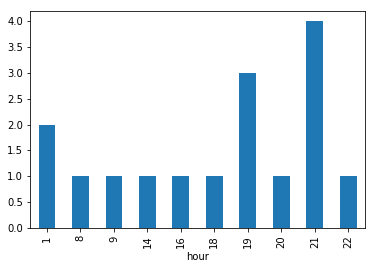

In [29]:
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

## Q 4) 
## What is the difference in Weekend vs Weekday usage pattern?
## How many words do I type on average on weekday vs weekend?



In [30]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Abinash CS Atul      32
Satyajit CS          21
Sujit CS             19
Manish CS            18
AniL CS              17
Subhashree CS        16
>>shubhajit          16
Amitabh              14
Dinesh CS            13
Rajib                12
Madhu CS             12
+91 95564 89867      12
Urbashi CS           12
Debasish CS          12
+91 70081 17186      11
Anu QnQn             10
Sanjukta CS          10
+91 93487 43366       8
Fahad CS              8
Heenu                 8
Rakesh CS             8
Subham Sharma CS      8
Arijit CS             7
Bikram CS             7
Jagat CS              7
Himanshu CS           7
Utkal CS              6
Swagat CS             4
Baburam CS            3
Ompriya CS            3
Smaranika CS          2
Smruti Keshari CS     2
Priyanka CS Kanki     2
Yashbant CS           2
Pint OO CS            1
Sibaprasad_Cs         1
Sourav Sadhu CS       1
Siso                  1
+91 85968 54944       1
Name: user, dtype: int64

In [31]:
top7_users = msgs_per_user.index.tolist()[:7]
top7_users

['Abinash CS Atul',
 'Satyajit CS',
 'Sujit CS',
 'Manish CS',
 'AniL CS',
 'Subhashree CS',
 '>>shubhajit']

In [32]:
df_top7 = df.copy()
df_top7 = df_top7[df_top7.user.isin(top7_users)]
df_top7.head()

,date_time,user,msg,weekday,is_weekend,hour
0,2019-07-03 11:33:00,Manish CS,All of you download there provisional and grad...,Wednesday,False,11
1,2019-07-03 11:33:00,Manish CS,From,Wednesday,False,11
2,2019-07-03 11:33:00,Manish CS,Login,Wednesday,False,11
7,2019-07-03 17:44:00,Satyajit CS,https://www.facebook.com/143848545696367/posts...,Wednesday,False,17
8,2019-07-04 11:10:00,Subhashree CS,Happy Rathayatra🙏🏻🙏🏻🙏🏻,Thursday,False,11


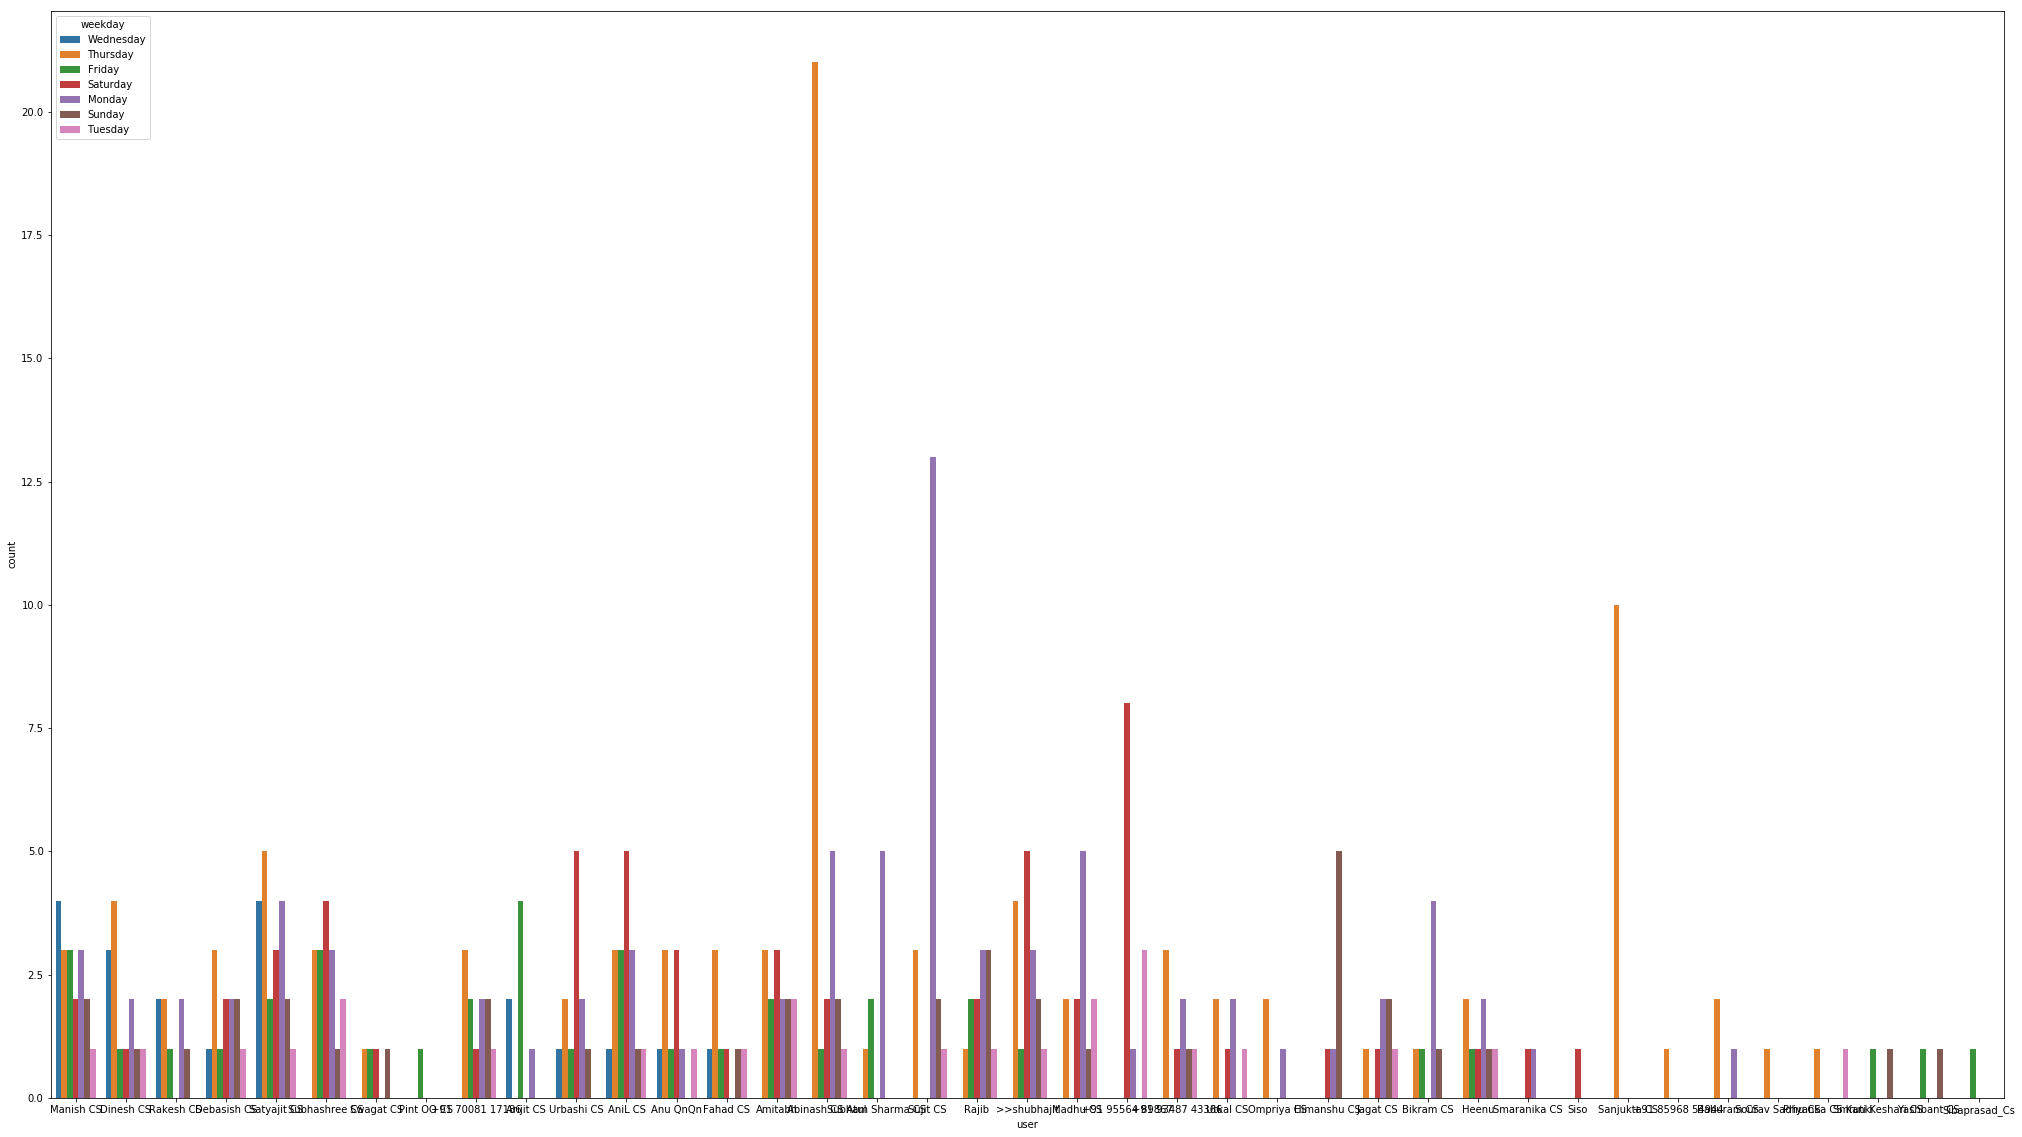

In [66]:
plt.figure(figsize=(35,20))
sns.countplot(x="user", hue="weekday", data=df);

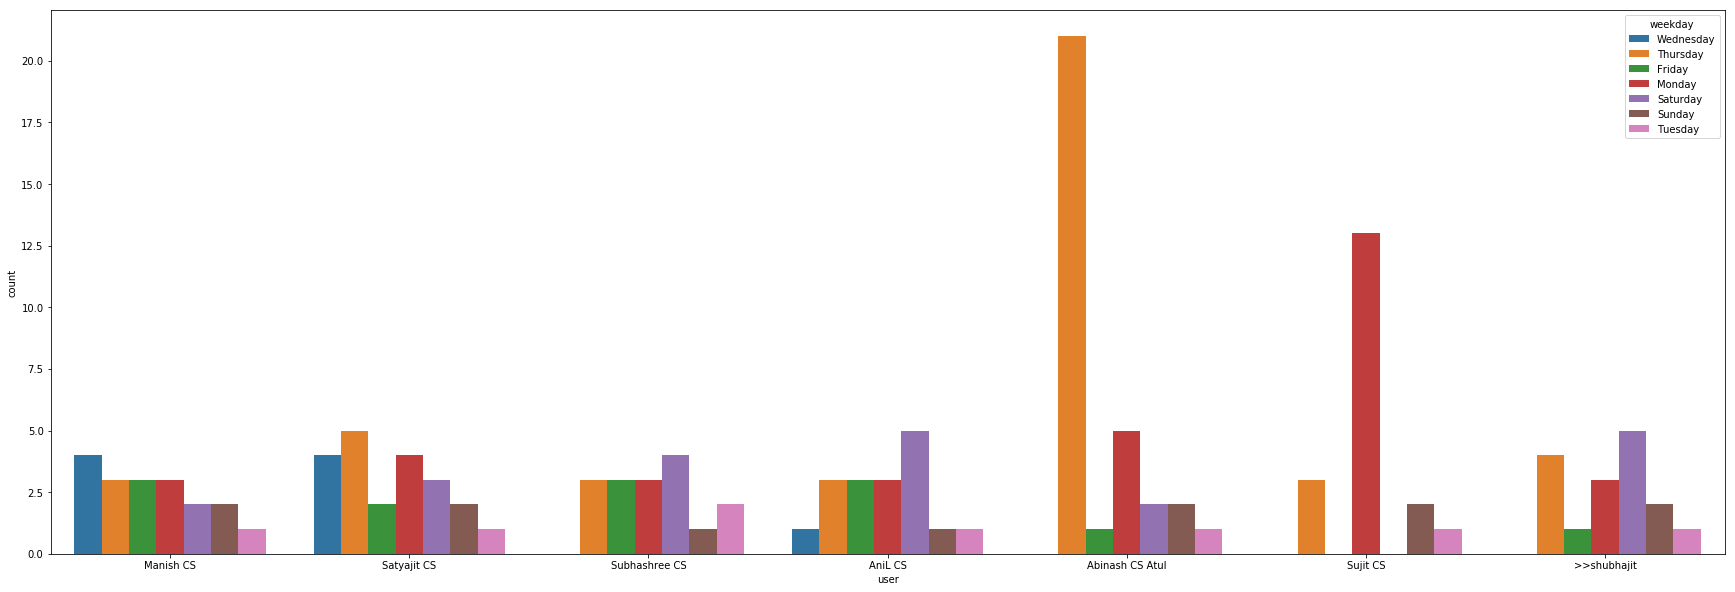

In [67]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df_top7);

In [34]:
df_top7['is_weekend'] = df_top7.weekday.isin(['Sunday', 'Saturday'])

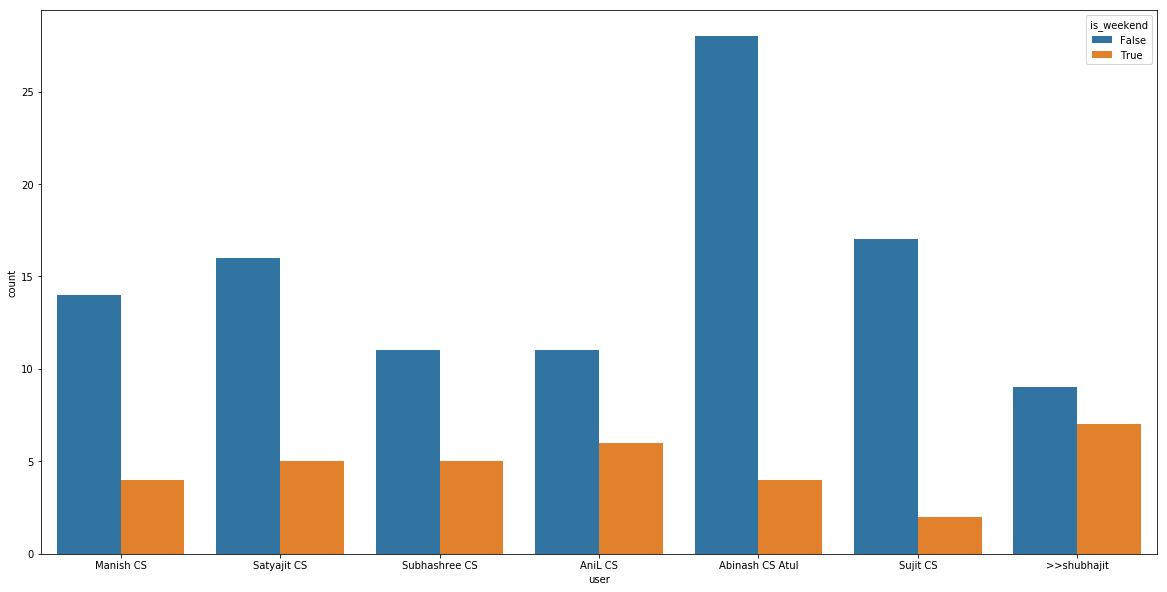

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top7);

In [36]:
def word_count(val):
    return len(val.split())

In [37]:
df['no_of_words'] = df['msg'].apply(word_count)

In [38]:
df_top7['no_of_words'] = df_top7['msg'].apply(word_count)

In [39]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

932

In [40]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

268

In [41]:
total_words_weekday/5

186.4

In [42]:
total_words_weekend/2

134.0

In [43]:
df.head()

,date_time,user,msg,weekday,is_weekend,hour,no_of_words
0,2019-07-03 11:33:00,Manish CS,All of you download there provisional and grad...,Wednesday,False,11,8
1,2019-07-03 11:33:00,Manish CS,From,Wednesday,False,11,1
2,2019-07-03 11:33:00,Manish CS,Login,Wednesday,False,11,1
3,2019-07-03 13:10:00,Dinesh CS,Waiting for this message,Wednesday,False,13,4
4,2019-07-03 17:06:00,Rakesh CS,Why?,Wednesday,False,17,1


In [44]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
Satyajit CS          115
Abinash CS Atul      107
Amitabh              101
Manish CS             64
>>shubhajit           56
Arijit CS             51
Debasish CS           47
Urbashi CS            45
AniL CS               42
+91 95564 89867       40
Dinesh CS             36
Sujit CS              36
Subhashree CS         36
+91 70081 17186       35
Fahad CS              34
Anu QnQn              33
Bikram CS             28
Rajib                 28
Rakesh CS             25
+91 93487 43366       25
Sanjukta CS           24
Heenu                 24
Madhu CS              24
Jagat CS              17
Subham Sharma CS      17
Himanshu CS           16
Utkal CS              15
Swagat CS             14
Baburam CS            12
Priyanka CS Kanki     10
Ompriya CS             9
Smruti Keshari CS      7
Yashbant CS            7
Smaranika CS           6
+91 85968 54944        5
Sourav Sadhu CS        4
Pint OO CS             2
Sibaprasad_Cs          2
Siso                   1
Name: no_of_words, d

In [45]:
(df.groupby('user')['no_of_words'].sum()/df.groupby('user').size()).sort_values(ascending=False)

user
Arijit CS            7.285714
Amitabh              7.214286
Satyajit CS          5.476190
Priyanka CS Kanki    5.000000
+91 85968 54944      5.000000
Fahad CS             4.250000
Sourav Sadhu CS      4.000000
Baburam CS           4.000000
Bikram CS            4.000000
Debasish CS          3.916667
Urbashi CS           3.750000
Manish CS            3.555556
>>shubhajit          3.500000
Yashbant CS          3.500000
Smruti Keshari CS    3.500000
Swagat CS            3.500000
Abinash CS Atul      3.343750
+91 95564 89867      3.333333
Anu QnQn             3.300000
+91 70081 17186      3.181818
+91 93487 43366      3.125000
Rakesh CS            3.125000
Ompriya CS           3.000000
Smaranika CS         3.000000
Heenu                3.000000
Dinesh CS            2.769231
Utkal CS             2.500000
AniL CS              2.470588
Jagat CS             2.428571
Sanjukta CS          2.400000
Rajib                2.333333
Himanshu CS          2.285714
Subhashree CS        2.250000
Subha

In [46]:
(df_top7.groupby('user')['no_of_words'].sum()/df_top7.groupby('user').size()).sort_values(ascending=False)

user
Satyajit CS        5.476190
Manish CS          3.555556
>>shubhajit        3.500000
Abinash CS Atul    3.343750
AniL CS            2.470588
Subhashree CS      2.250000
Sujit CS           1.894737
dtype: float64

In [47]:
wordPerMsg_weekday_vs_weekend = (df_top7.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top7.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user             is_weekend
>>shubhajit      False         3.333333
                 True          3.714286
Abinash CS Atul  False         3.428571
                 True          2.750000
AniL CS          False         2.636364
                 True          2.166667
Manish CS        False         3.714286
                 True          3.000000
Satyajit CS      False         5.500000
                 True          5.400000
Subhashree CS    False         2.727273
                 True          1.200000
Sujit CS         False         1.823529
                 True          2.500000
dtype: float64

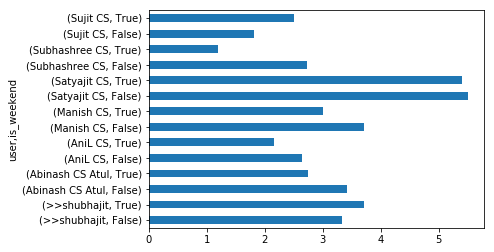

In [48]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

## Q 5)
## Most Usage - Time of Day

In [49]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.tail()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
19,8.0,3.0,23.0,2.0,NaN,NaN,1.0
20,1.0,2.0,1.0,1.0,5.0,6.0,NaN
21,1.0,1.0,26.0,NaN,NaN,16.0,3.0
22,3.0,48.0,3.0,NaN,2.0,1.0,3.0
23,2.0,NaN,1.0,NaN,NaN,2.0,NaN


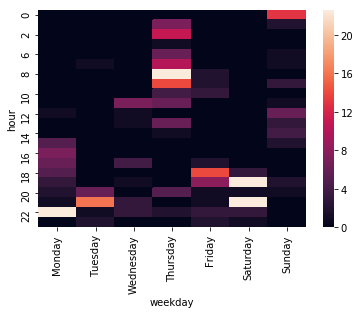

In [50]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

## Q 6)
## In any group, do I have any inclination towards responding to someone? 

In [51]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[ 52  78  86  90 120 133 134 171 174 190 268 283 296 312 332 334] (16,)


In [52]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[ 51  77  85  89 119 132 133 170 173 189 267 282 295 311 331 333] (16,)


In [53]:
prev_msgs_index = np.delete(prev_msgs_index, 0)
prev_msgs_index

array([ 77,  85,  89, 119, 132, 133, 170, 173, 189, 267, 282, 295, 311,
       331, 333])

In [54]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(15, 7)

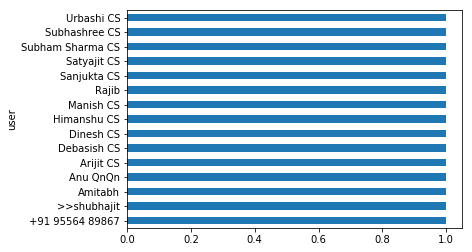

In [55]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

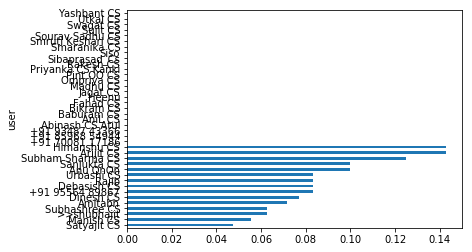

In [56]:
(df_replies.groupby(["user"])["msg"].size()/df.groupby(["user"])["msg"].size()).sort_values().plot(kind='barh')

## Q 7)
## Which are the most common words?

In [57]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo','u', 're', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


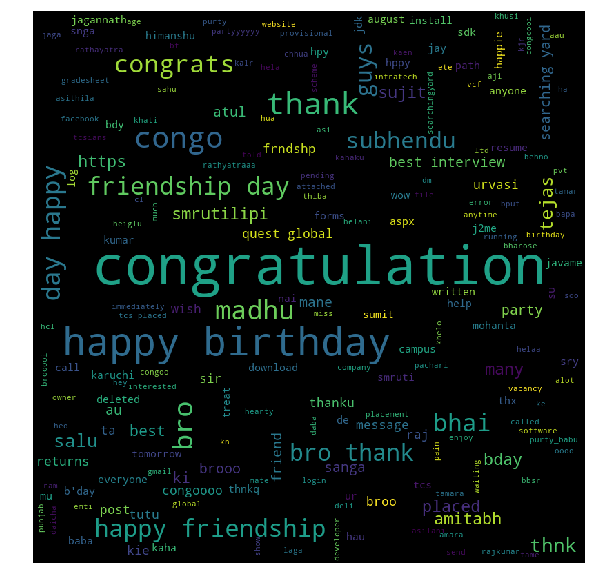

In [58]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

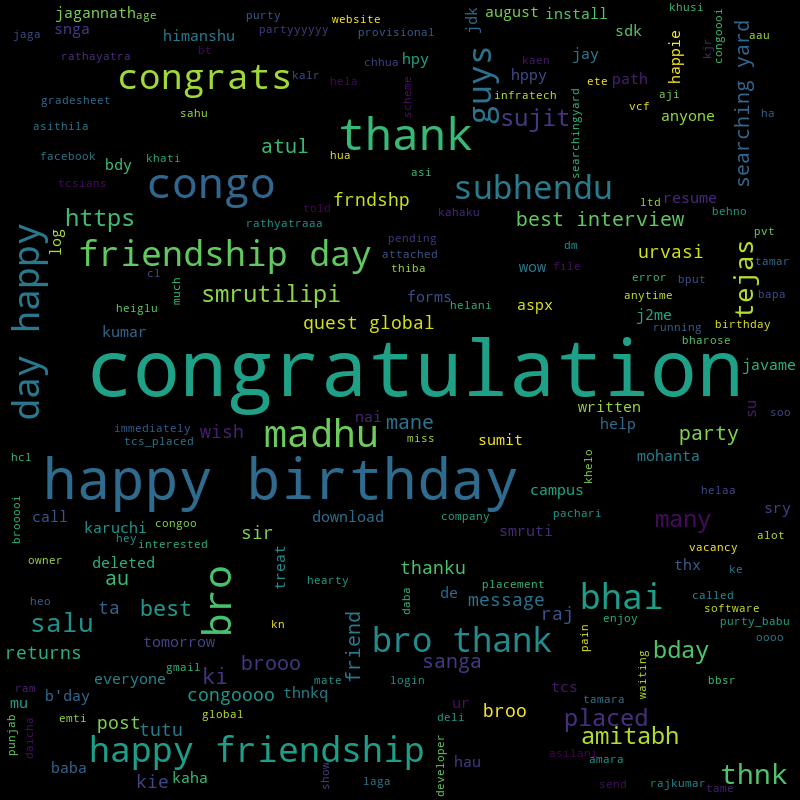

In [59]:
wordcloud.to_image()

Know What They Know(atleast by little)
* Let this meetup series encourage people to work on their own data:
    * Ask many questions on whatsapp chat data, commit to jovian with your answers/analysis visulization. Experiment!!!
* Explore more data resources here's a list i could find, share if you find any @ dsnet.org
    * WhatsApp
    * Google take out (https://takeout.google.com/)
        * Keyboard
        * Maps
        * Calendar 
        * Chrome
        * Pay
        * etc....
    * https://www.cnet.com/how-to/how-to-download-all-your-instagram-data/
    * https://in.pcmag.com/software/120204/how-to-download-your-facebook-data-and-6-surprising-things-i-found
* Lets move step by step and then move to some ML/DL Models 

* 1way ya 2way